In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import pickle
from my_to_midi import *
from sequence_example_lib import *
import copy

In [4]:
index_to_char_str = "._0123456789abcdefghijklmnopqrstuvwxyz"
char_to_index = dict((c, i) for i, c in enumerate(index_to_char_str))
index_to_char = dict((i, c) for i, c in enumerate(index_to_char_str))

In [5]:
def text_to_events(str):
    ret = []
    for i in str:
        ret.append(char_to_index[i])
    return ret 

In [ ]:
# 只关心音程不关心节奏，去除所有的0

In [58]:
base_line_file = open("/Users/mac/Desktop/MusicGeneration/Magenta_BasicRNN_text_datasets/Bach/Bach_eval.txt",'r')
base_line = base_line_file.read()
base_events = text_to_events(base_line)
base_events = np.array(base_events)
base_events = base_events[np.nonzero(base_events)]
base_events = base_events[base_events!=1]
print(base_events)

[18 21 25 ... 18 16 14]


In [59]:
diff_base = np.diff(base_events, axis=0)

In [60]:
diff_base

array([ 3,  4,  5, ...,  0, -2, -2])

In [61]:
step = np.arange(0, 400 ,1)

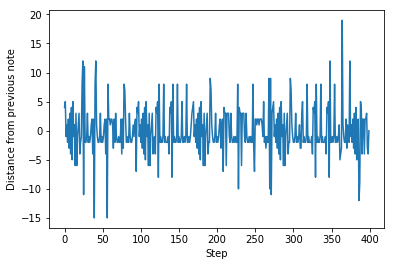

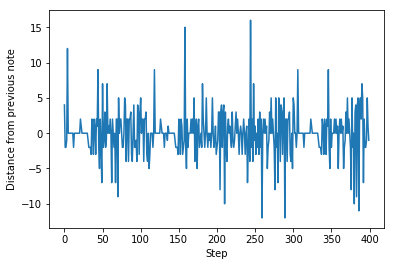

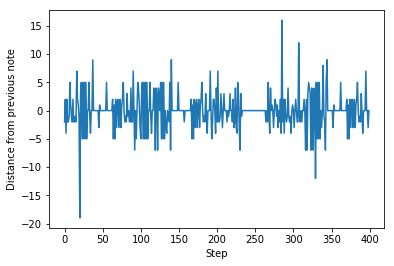

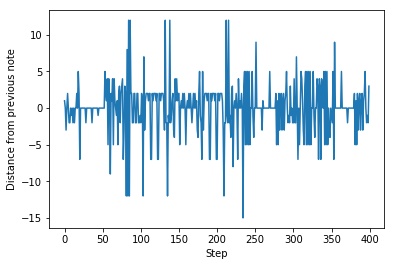

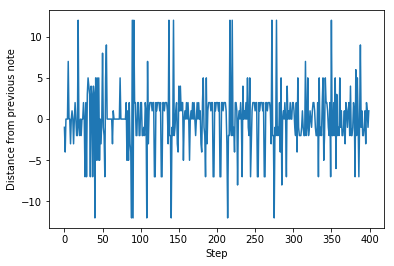

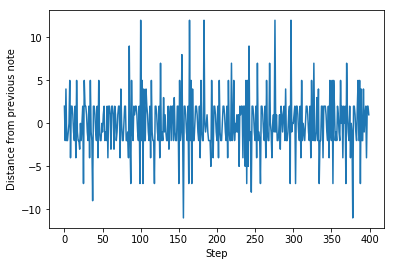

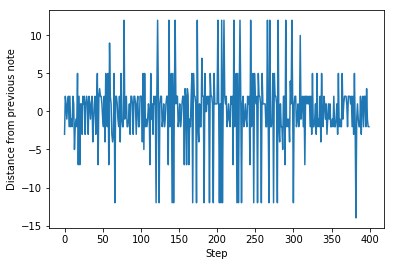

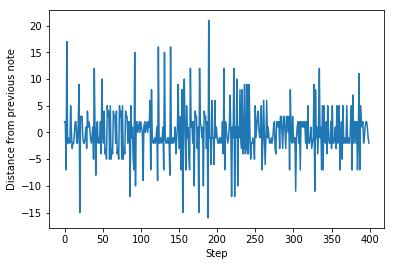

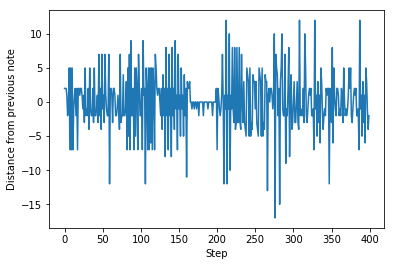

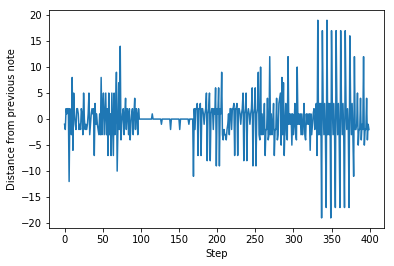

In [73]:
base_parts=[]
for i in range(10):
    base_parts.append(diff_base[i*400+1:(i+1)*400+1])

for i in range(10):
    #plt.subplot(10, 1, i+1)
    plt.plot(step, np.array(base_parts[i]))
    plt.xlabel('Step')
    plt.ylabel('Distance from previous note')
    plt.show()
    
#plt.show()

In [72]:
def diff_to_events(diff_events, start_note):
    ret = []
    ret.append(start_note)
    for i, event in enumerate(diff_events):
        ret.append(ret[i]+event)
    return ret

In [44]:
from_diff_events = diff_to_events(diff_base, 18)
events_to_midi('basic_rnn', from_diff_events, '~/Desktop', 'test_diff')

INFO:tensorflow:Wrote test_diff.mid to ~/Desktop
